<a href="https://colab.research.google.com/github/mcmaharrey/MLA_MCM/blob/main/FinalProject_Regression_MCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Matthew Maharrey <br>
CS430-ON <br>
Final Project Regression**

**Imports**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/CS430_Final_Project/Concrete_Data.xlsx')

In [ ]:
df.columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']


**Statistics and Visual Exploration**

In [ ]:
print(df.head())

   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate  age  concrete_compressive_strength  
0            1040.0           676.0   28                      79.986111  
1            1055.0           676.0   28                      61.887366  
2             932.0           594.0  270                      40.269535  
3             932.0           594.0  365                      41.052780  
4             978.4           825.5  360                      44.296075  


In [ ]:
numerical_summary = df.describe()
print(numerical_summary)

            cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate          age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.203112        972.918592      773.578883    45.662136   
std            5.973492         77.753818       80.175427    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.

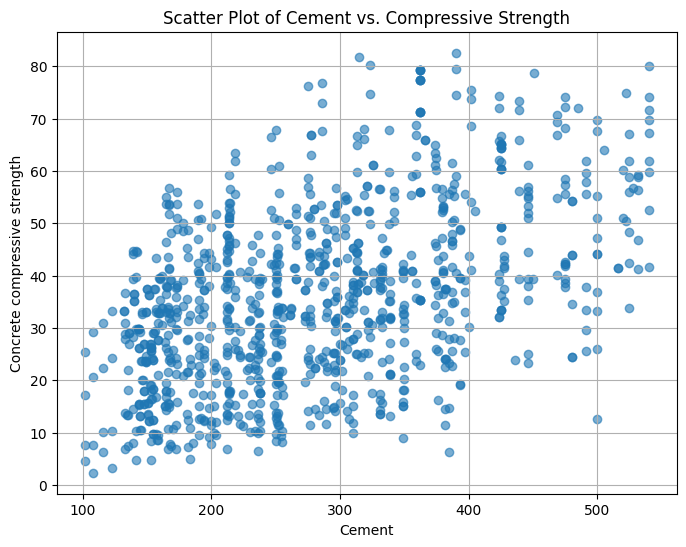

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['cement'], df['concrete_compressive_strength'], alpha=0.6)
plt.xlabel('Cement')
plt.ylabel('Concrete compressive strength')
plt.title('Scatter Plot of Cement vs. Compressive Strength')
plt.grid(True)
plt.show()


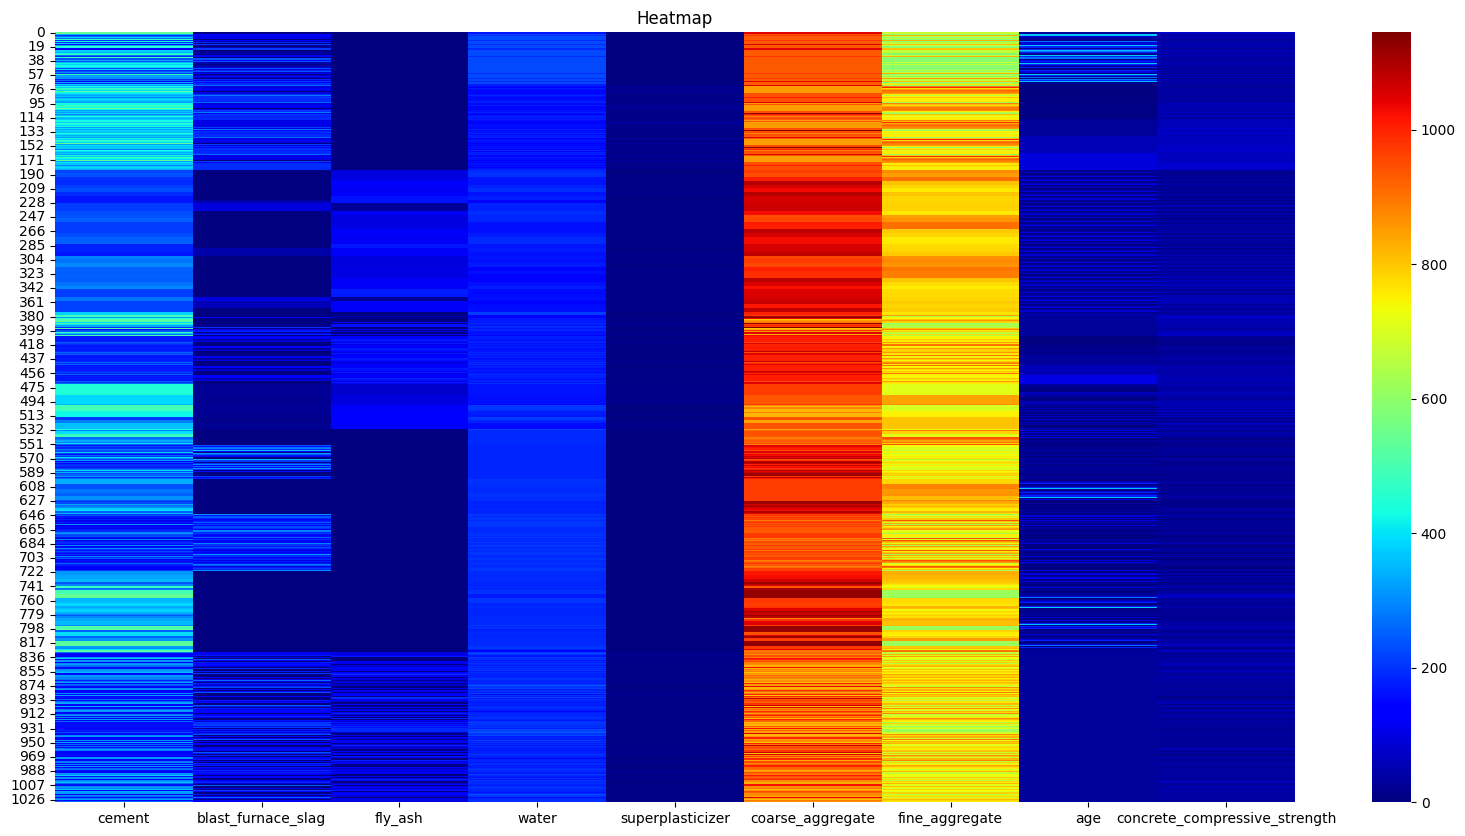

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df, cmap='jet')
plt.title('Heatmap')
plt.show()

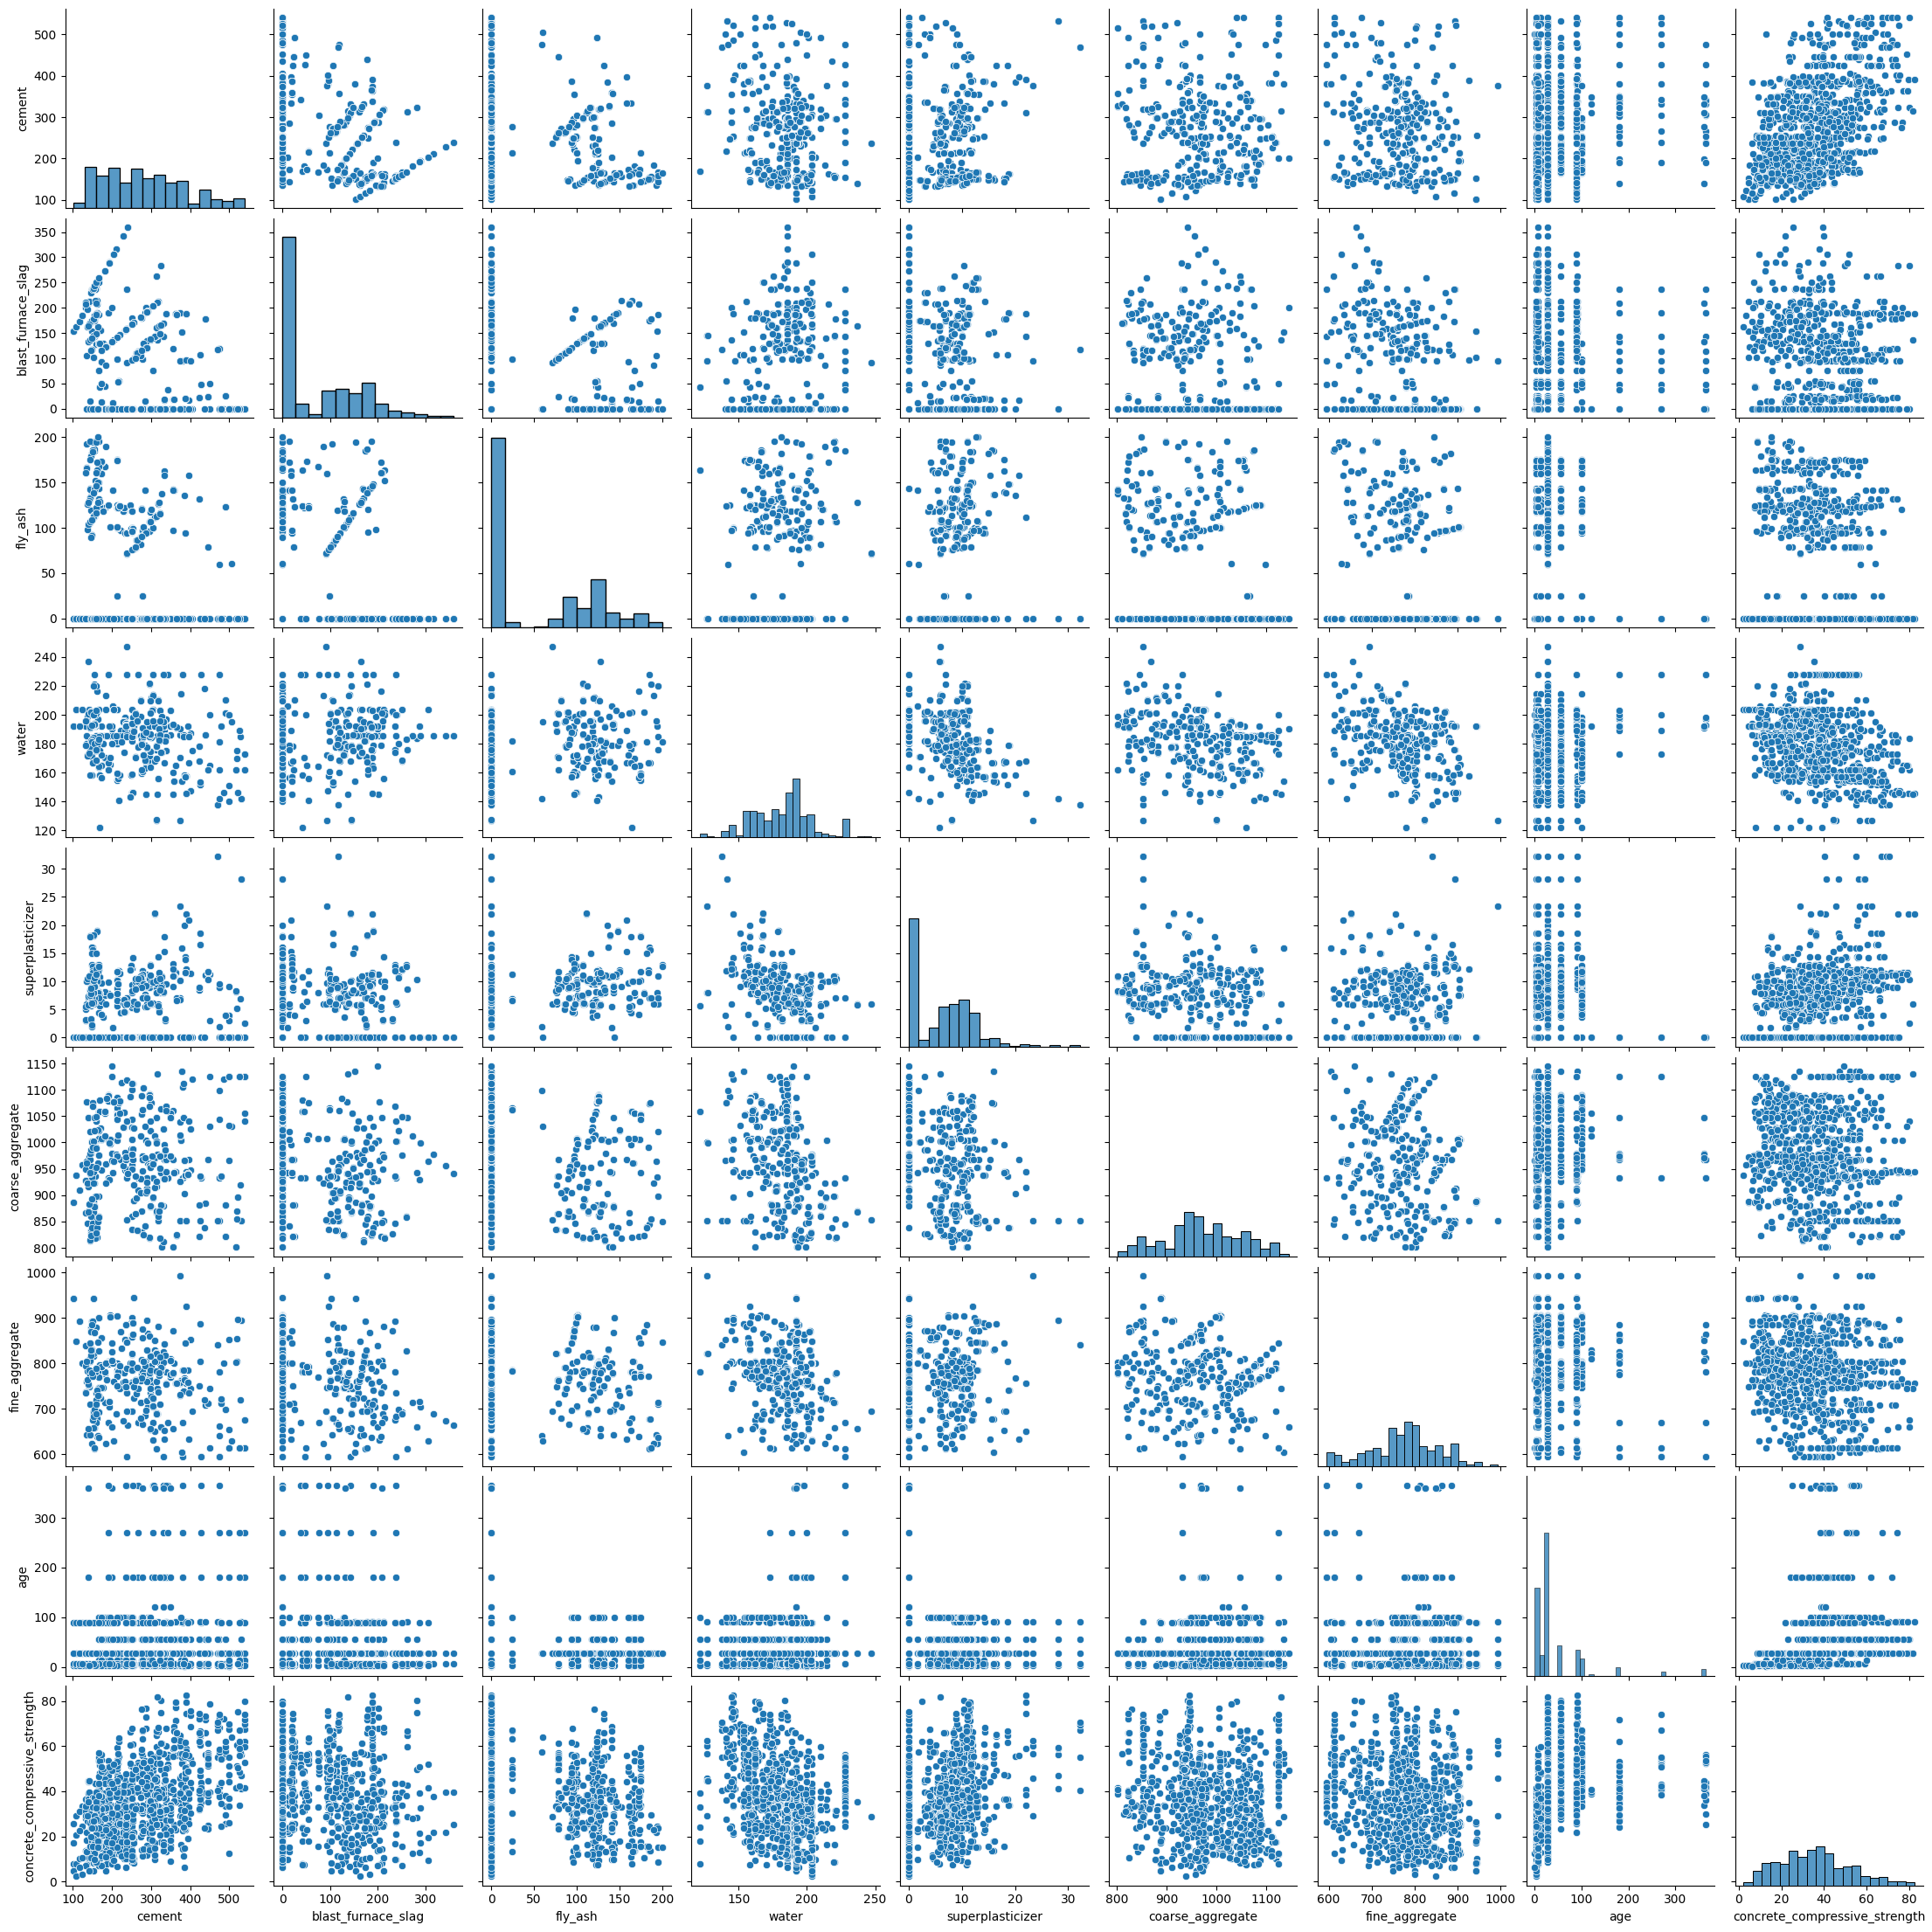

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numerical_columns)
plt.show()

**Splitting Data into Train/Test**

In [ ]:
X = df.drop(columns=['concrete_compressive_strength'])
y = df['concrete_compressive_strength']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (824, 8)
X_test shape: (206, 8)
y_train shape: (824, 1)
y_test shape: (206, 1)


**Building the Pipeline**

In [ ]:
linear_regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

In [ ]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR())
])

**Executing the Model**

In [ ]:
linear_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [ ]:
linear_regression_predictions = linear_regression_pipeline.predict(X_test)

In [ ]:
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
print("Linear Regression Mean Squared Error:", linear_regression_mse)

Linear Regression Mean Squared Error: 95.97548435337703


**SVM**

In [ ]:
svm_parameters = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

In [ ]:
svm_grid_search = GridSearchCV(svm_pipeline, svm_parameters, cv=5, scoring='neg_mean_squared_error')

In [ ]:
y_train = y_train.ravel()

In [ ]:
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVR())]),
             param_grid={'svm__C': [0.1, 1, 10], 'svm__gamma': [0.1, 1, 10],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [ ]:
best_svm_model = svm_grid_search.best_estimator_
svm_predictions = best_svm_model.predict(X_test)

In [ ]:
svm_mse = mean_squared_error(y_test, svm_predictions)
print("SVM Mean Squared Error:", svm_mse)

SVM Mean Squared Error: 53.05358159925013


In [ ]:
linear_regression_train_rmse = np.sqrt(mean_squared_error(y_train, linear_regression_pipeline.predict(X_train)))
linear_regression_test_rmse = np.sqrt(mean_squared_error(y_test, linear_regression_predictions))

svm_train_rmse = np.sqrt(mean_squared_error(y_train, best_svm_model.predict(X_train)))
svm_test_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))

print("Linear Regression RMSE (Train):", linear_regression_train_rmse)
print("Linear Regression RMSE (Test):", linear_regression_test_rmse)
print("SVM RMSE (Train):", svm_train_rmse)
print("SVM RMSE (Test):", svm_test_rmse)

Linear Regression RMSE (Train): 10.519589880063482
Linear Regression RMSE (Test): 9.796707832398445
SVM RMSE (Train): 6.494528150007881
SVM RMSE (Test): 7.283788958999988


According to the Linear Regression RMSE and the SVM RMSE the SVM model shows to perfrom better than the Linear Regression. Both values have low RMSE values which show that they are performing well. ,

Overall, the SVM model preformed better than the linear regression model when looking at the RMSE values. I feel that when using this dataset the SVM model would be the better choice.